## Exercise 2

### Katariina Perkonoja | 514629

#### 1. Load the Iris dataset from http://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
import pandas as pd

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.loc[1:10] # checking out that the data matrix looks like as it should

,sepal-length,sepal-width,petal-length,petal-width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


#### 2. Calculate the mean, median and standard deviation for all attributes of Iris setosa

In [4]:
import numpy as np

In [5]:
setosa = dataset.loc[dataset["class"]== "Iris-setosa"] # creating new dataset containing only Setosa

In [6]:
np.mean(setosa) # mean of all attributes

sepal-length    5.006
sepal-width     3.418
petal-length    1.464
petal-width     0.244
dtype: float64

In [7]:
np.median(setosa.loc[:,['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], axis = 0) # median of all attributes

array([5. , 3.4, 1.5, 0.2])

In [8]:
np.std(setosa) # standard deviation of all attributes

sepal-length    0.348947
sepal-width     0.377195
petal-length    0.171767
petal-width     0.106132
dtype: float64

#### 3. Select one attribute for species Iris setosa. Plot four histograms of the attribute using the methods intoduced in the lectures (Sturges, Scott, Square root, and Freedman-Diaconis) to determine the number of bins. Compare the results. 

In [9]:
import matplotlib.pyplot as plt

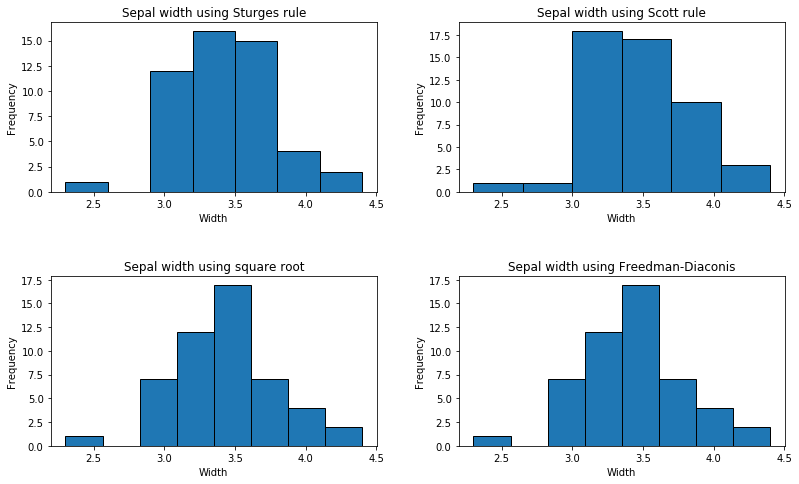

In [10]:
plt.rcParams['figure.figsize'] = [12, 7] # scaling figures to be larger on output

# creating 2x2 plot where all histograms are shown simultaneously

plt.subplot(221) 
plt.hist(setosa.loc[:,'sepal-width'], bins = "sturges",edgecolor='k') # histogram of sepal width using Sturges' rule
plt.title('Sepal width using Sturges rule') # setting title
plt.xlabel('Width') # setting x-axis text
plt.ylabel('Frequency') # setting y-axis text

plt.subplot(222)
plt.hist(setosa.loc[:,'sepal-width'], bins = "scott",edgecolor='k') # histogram of sepal width using Scotts rule
plt.title('Sepal width using Scott rule')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(223)
plt.hist(setosa.loc[:,'sepal-width'], bins = "sqrt",edgecolor='k') # histogram of sepal width using square root
plt.title('Sepal width using square root')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(224)
plt.hist(setosa.loc[:,'sepal-width'], bins = "fd",edgecolor='k') # histogram of sepal width using Freedman-Diaconis' rule
plt.title('Sepal width using Freedman-Diaconis')
plt.xlabel('Width')
plt.ylabel('Frequency')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.25)

All histograms show the outliers of sepal width as they should (starting and ending points of the data). When using Sturges' rule the histogram seems to center heavily around the median and the highest bin is drawn on it. The histogram using Scott's rule is continuous all the way though the first two bins have really low frequency. It seems to center the two tallest bins around the median but it still looks a bit skewed on the left. Both first two histograms have 6 bins. The last two histograms look identical, both having 7 bins drawn on same places. They're also more eavenly distributed around the median than the first two histograms especially compared to histogram using Scott's rule.

#### Next we would like to see if the distributions of the values for different flower species vary in some way. Plot histograms of your attribute for Iris virginica and Iris versicolor. Do these histograms give any indication about the feasibility or infeasibility of classifying the flower species?


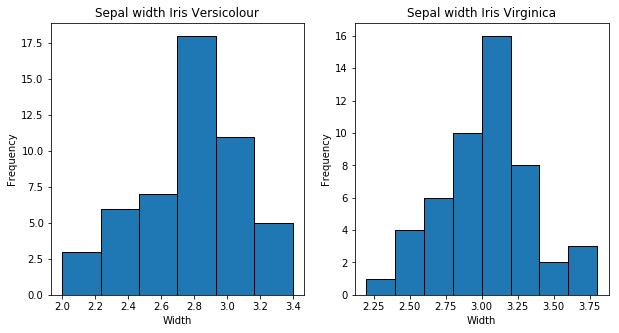

In [11]:
# creating new separate datasets for each class

versi = dataset.loc[dataset["class"]== "Iris-versicolor"]
virgi = dataset.loc[dataset["class"]== "Iris-virginica"]

# for simplicity using only Freedman-Diaconis' rule

plt.rcParams['figure.figsize'] = [10, 5]

plt.subplot(121) 
plt.hist(versi.loc[:,'sepal-width'], bins = "fd",edgecolor='k')
plt.title('Sepal width Iris Versicolour')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(virgi.loc[:,'sepal-width'], bins = "fd",edgecolor='k')
plt.title('Sepal width Iris Virginica')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.show()

Both Versicolour's and Virginica's histograms and so their distributions differ from each other and also from Setosa's. Versicolor's histogram has only 6 bin whereas Virginica has 8 and Setosa has 7. Histograms also differ between min and max values and where the highest frequency bin is drawn so they give indication about the feasibility of the flower species.

#### 4. Produce boxplot plots of attributes. Can you see any outliers?

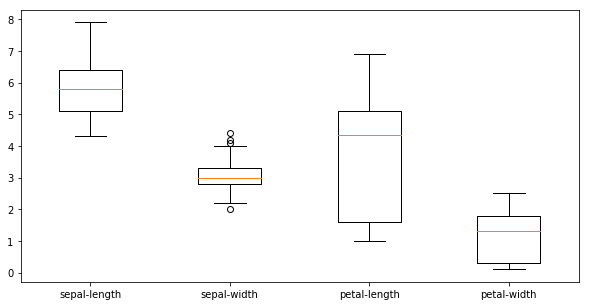

In [12]:
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
x = dataset.loc[:, features].values # separating out the features
y = dataset.loc[:,['class']].values # separating out the target

plt.boxplot(x)
plt.xticks((1,2,3,4), ('sepal-length', 'sepal-width', 'petal-length', 'petal-width'))

plt.show()

Only sepal width has outliers which was seen earlier on histograms.

#### 5. Calculate Pearson’s correlation tables for the attributes. These numbers may give us some indication about simple (linear) relationships between features. Calculate also Spearman’s rho and Kendall’s tau values. What is the purpose of these values? What features correlate linearly with each other? Does this exclude any other sort of correlation? Produce scatter plots of interesting features. 

In [13]:
dataset.corr(method='pearson') # Pearson correlation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [14]:
dataset.corr(method='spearman') # Spearman correlation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.159457,0.881386,0.834421
sepal-width,-0.159457,1.000000,-0.303421,-0.277511
petal-length,0.881386,-0.303421,1.000000,0.936003
petal-width,0.834421,-0.277511,0.936003,1.000000


In [15]:
dataset.corr(method='kendall') # Kendal correlation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.072112,0.717624,0.654960
sepal-width,-0.072112,1.000000,-0.182391,-0.146988
petal-length,0.717624,-0.182391,1.000000,0.803014
petal-width,0.654960,-0.146988,0.803014,1.000000


There seems to be pretty strong correlations between (sepal length-petal length), (sepal length-petal width) and (pedal length-pedal width) according to Pearson's correlation coefficients. These features could have linear relationship with each other. Spearman's correlation coefficients for (sepal length-petal length) and (sepal length-petal width) are a bith higher with respect to Pearson's coefficients which could indicate some other than linear relationship. Hypothesis can be tested statistically. In theory some other kind of relationship could be possible even though coefficients are reasonably high. Usually scatter plot reveals the nature of the relationship.

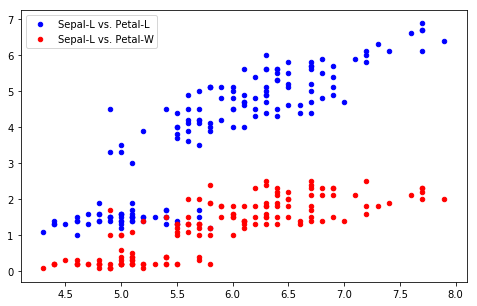

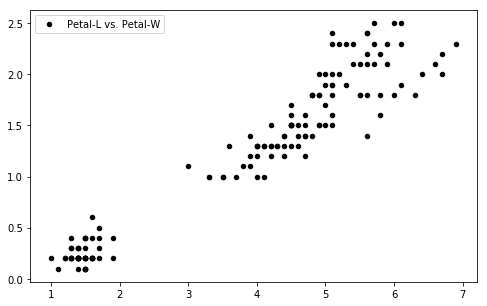

In [16]:
# creating scatterplots

plt.rcParams['figure.figsize'] = [8, 5]

ax1 = dataset.plot(kind='scatter', x='sepal-length', y='petal-length', color='b')    
ax2 = dataset.plot(kind='scatter', x='sepal-length', y='petal-width', color='r', ax=ax1)
plt.xlabel('')
plt.ylabel('')
plt.legend(['Sepal-L vs. Petal-L','Sepal-L vs. Petal-W'], loc = 0)

dataset.plot(kind='scatter', x='petal-length', y='petal-width', color='k')
plt.xlabel('')
plt.ylabel('')
plt.legend(['Petal-L vs. Petal-W'], loc = 0)

plt.show()

Sepal length seems to be in linear relationship with petal length but there's also some clustering when petal length is less than 2 (see interpretation on the last sentence). The relationship between sepal length and petal width seems pretty stationary which was earlier indicated by Spearman's coefficient as well so the relationship is something else than linear. Petal length and petal width have linear relationship but there is also some clustering which indicates that one flower species could differ from others.

#### 6. Principal component analysis (PCA) with and without z-score normalization: project the data to the first two principal components. Visualize the result as a scatter plot. What is the proportion of variance explained in projections? What can be observed?

Some help for writing the code got from here (mainly for plotting): https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

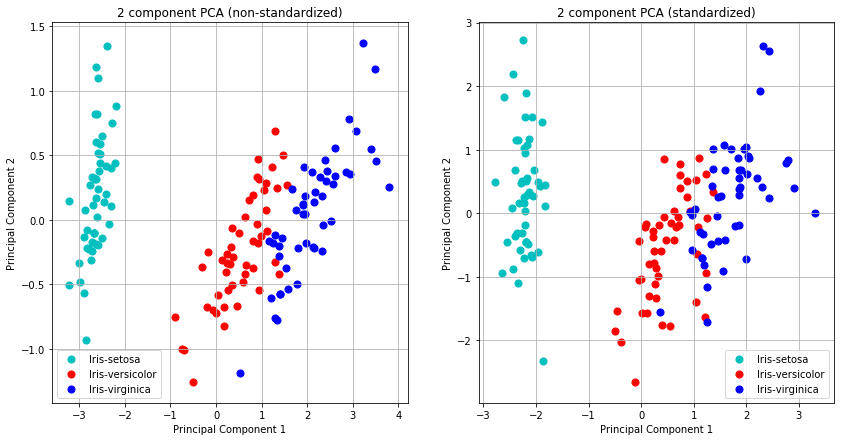

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# PCA for non-standardized data

princomp1 = pca.fit_transform(x) # performing PCA
prinDf1 = pd.DataFrame(data = princomp1, columns = ['PC1', 'PC2']) # creating dataframe from the results
finalDf1 = pd.concat([prinDf1, dataset[['class']]], axis = 1) # combining them whith the class

fig = plt.figure(figsize = (14,7))

ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA (non-standardized)')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['c', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1['class'] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'PC1']
               , finalDf1.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

nonratio = pca.explained_variance_ratio_.round(4) # storing proportional variances

# PCA for standardized data

from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(x) # standardizing the features

princomp2 = pca.fit_transform(x1) 
prinDf2 = pd.DataFrame(data = princomp2, columns = ['PC1', 'PC2'])

finalDf2 = pd.concat([prinDf2, dataset[['class']]], axis = 1)

ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA (standardized)')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['c', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['class'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC1']
               , finalDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

stanratio = pca.explained_variance_ratio_.round(4)

In [18]:
print(nonratio,stanratio) # proportions of variances
print(np.sum(nonratio), np.sum(stanratio)) # cumulative 

[0.9246 0.053 ] [0.7277 0.2303]
0.9776 0.958


All flower species form its own cluster but Setosa differs clearly from Versicolour and Virginica based on the first component. Based on second component there's no clear differencies between species even though after standardizing the data Setosa is a bit more loaded on second component. In unstandardized data the prortional variance is higher for component 1 than in standardized data and in standardized data the proportional variance for component 2 is significantly higher than in unstandardized data. The cumulative proportional variance is almost the same for both, a bit less for standardized data.

#### BONUS: Familiarize yourself with some other dimensionality reduction method than PCA. Describe the basic principles of the method. Project the data to two dimensions using this method, present the scatter plot and compare the results to PCA. 

PCA is based on uncorrelation of factors so let's see what happens if we use Factor Analysis which is based on the correlation of factors. FA can also be used to find latent variables or underlying model whereas PCA is mainly used for dimensionality reduction. They're often times mistakenly thought to be a same method but they're not.

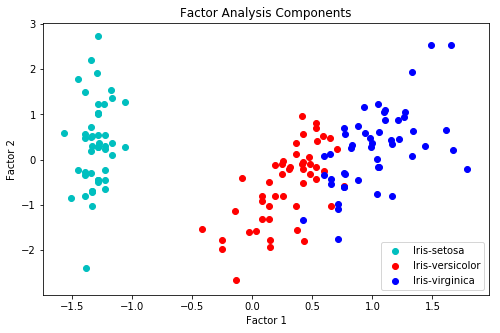

In [19]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components = 2).fit_transform(x1) # performing FA to standardized data

plt.figure(figsize=(8,5))
plt.title('Factor Analysis Components')
plt.scatter(fa[0:49,0], fa[0:49,1], color = 'c')
plt.scatter(fa[50:99,0], fa[50:99,1], color = 'r')
plt.scatter(fa[100:149,0], fa[100:149,1], color = 'b')

plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], loc = 0)

plt.show()

Setosa is still clearly separated from the others but now Versicolour and Virginica also differ more from each other (based on the first factor) even though there's still some overlap. There's also slight difference between (on average) them when second factor is considered. The difference may be due to higher variance between the observations in the class. 